# GERMANY CARS FROM 2011-2021 ANALYSIS AND PREDICTIVE MODEL PROJECT

## INTRODUCTION

 In the modern automotive industry, accurately predicting car prices is crucial for both buyers and sellers. In Germany, where the used car market is highly dynamic, factors such as mileage, brand, fuel type, and horsepower significantly impact pricing. This project aims to build a predictive model for estimating car prices using machine learning techniques, leveraging historical data of used cars.

## Project Overview

This study involves:

1. Data Cleaning: Handling missing values, correcting inconsistencies, and ensuring uniform formatting.

2. Exploratory Data Analysis (EDA): Understanding relationships between features like mileage, fuel type, and price distribution.

3. Model Development: Training and evaluating three regression models:
      
         a.Linear Regression
      
         b.Decision Tree Regressor
      
         c.Random Forest Regressor
      
The dataset includes features such as mileage, make, model, fuel type, transmission (gear), offer type, price, horsepower (hp), and year. The goal is to determine which features most influence car prices and to develop an accurate, generalizable model for price prediction.

## Expected Outcome

By comparing the performance of different models, we aim to select
the most reliable one for predicting car prices in Germany. 
The results will help potential buyers and 
sellers make informed decisions based on data-driven insights.

#

#### LOADING THE DATASET, CLEANING and PERFORMING Exploratory Data Analysis

In [1]:
# importing the needed libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from math import *
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline 

In [2]:
# loading the data
df = pd.read_csv("C://Users//quays//Desktop//germany cars.csv")

In [3]:
# viewing the first five rows
df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [4]:
# checking the shape of the dataset
df.shape

(46405, 9)

In [5]:
# viewing the last 5 rows
df.tail()

,mileage,make,model,fuel,gear,offerType,price,hp,year
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46402,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46403,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46404,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


In [6]:
# checking for column data types
df.dtypes

mileage        int64
make          object
model         object
fuel          object
gear          object
offerType     object
price          int64
hp           float64
year           int64
dtype: object

In [7]:
# checking for the number of uniques for each column 
df.nunique()

mileage      20117
make            77
model          841
fuel            11
gear             3
offerType        5
price         6668
hp             328
year            11
dtype: int64

In [8]:
# checking for the unique values of the columns fuel, gear, offertype
df['fuel'].unique()

array(['Diesel', 'Gasoline', 'Electric/Gasoline', '-/- (Fuel)',
       'Electric', 'Electric/Diesel', 'CNG', 'LPG', 'Others', 'Hydrogen',
       'Ethanol'], dtype=object)

In [9]:
# Replace '-/- (Fuel)' with 'Biodiesel' in the 'fuel' column
df['fuel'] = df['fuel'].str.strip().replace('-/- (Fuel)', 'Biodiesel')

In [10]:
df['gear'].unique()

array(['Manual', 'Automatic', nan, 'Semi-automatic'], dtype=object)

In [11]:
df['offerType'].unique()

array(['Used', 'Demonstration', "Employee's car", 'Pre-registered', 'New'],
      dtype=object)

In [12]:
# checking for null values
df.isnull().sum()

mileage        0
make           0
model        143
fuel           0
gear         182
offerType      0
price          0
hp            29
year           0
dtype: int64

In [13]:
# dropping the null containing rows 
df.dropna(inplace = True)

In [14]:
# checking for info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46071 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46071 non-null  int64  
 1   make       46071 non-null  object 
 2   model      46071 non-null  object 
 3   fuel       46071 non-null  object 
 4   gear       46071 non-null  object 
 5   offerType  46071 non-null  object 
 6   price      46071 non-null  int64  
 7   hp         46071 non-null  float64
 8   year       46071 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.5+ MB


In [15]:
# checking for duplicated rows 
df.duplicated().sum()

2124

In [16]:
# droping the duplicated rows 
df.drop_duplicates(inplace = True)

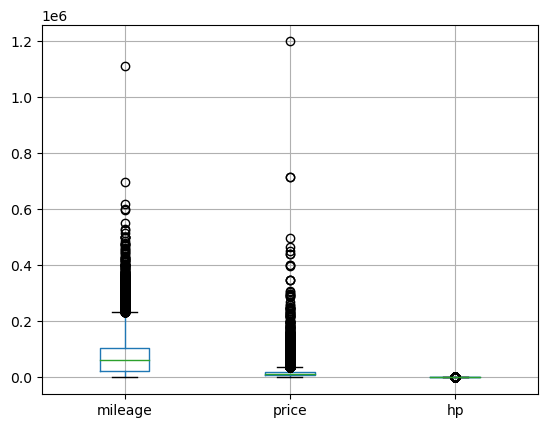

In [17]:
# checkinf for outliers
df[["mileage", "price", "hp"]].boxplot()
plt.show()

In [18]:
# removing the outliers in the dataset
def remove_outliers(df, threshold=1.5):
    df_clean = df.copy()
    columns = ["mileage", "price", "hp"]  # Columns to clean

    for col in columns:
        if col in df_clean.columns:
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - (threshold * IQR)
            upper_bound = Q3 + (threshold * IQR)
            df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    return df_clean

In [19]:
# storing the cleaned data with the outleirs removed in df_cleaned
df_cleaned = remove_outliers(df)
df_cleaned

,mileage,make,model,fuel,gear,offerType,price,hp,year
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
5,147000,Toyota,Auris,Electric/Gasoline,Automatic,Used,6950,99.0,2011
...,...,...,...,...,...,...,...,...,...
46394,10,Citroen,C1,Gasoline,Manual,Pre-registered,12340,72.0,2021
46396,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12490,71.0,2021
46397,550,Fiat,500,Electric/Gasoline,Manual,Demonstration,12805,69.0,2021
46398,837,Fiat,Panda,Electric/Gasoline,Manual,Demonstration,12805,69.0,2021


In [20]:
# converting the hp from float to int 
df_cleaned['hp'] = df_cleaned['hp'].astype(int)

In [21]:
# converting the values in the non numeric columns to lower
non_numeric_cols = df_cleaned.select_dtypes(exclude=['number']).columns
df_cleaned[non_numeric_cols] = df_cleaned[non_numeric_cols].apply(lambda x: x.astype(str).str.lower())

In [22]:
# reviewing the data
df_cleaned.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
1,92800,volkswagen,golf,gasoline,manual,used,6877,122,2011
2,149300,seat,exeo,gasoline,manual,used,6900,160,2011
3,96200,renault,megane,gasoline,manual,used,6950,110,2011
4,156000,peugeot,308,gasoline,manual,used,6950,156,2011
5,147000,toyota,auris,electric/gasoline,automatic,used,6950,99,2011


In [23]:
# description of the cleaned data
df_cleaned.describe(include = 'all')

,mileage,make,model,fuel,gear,offerType,price,hp,year
count,39216.000000,39216,39216,39216,39216,39216,39216.000000,39216.000000,39216.000000
unique,NaN,55,595,11,3,5,NaN,NaN,NaN
top,NaN,volkswagen,golf,gasoline,manual,used,NaN,NaN,NaN
freq,NaN,6079,1391,25413,28094,34857,NaN,NaN,NaN
mean,71072.900678,NaN,NaN,NaN,NaN,NaN,12879.328743,116.077417,2015.760225
std,54777.498281,NaN,NaN,NaN,NaN,NaN,7705.107783,40.633522,3.075647
min,0.000000,NaN,NaN,NaN,NaN,NaN,1100.000000,1.000000,2011.000000
25%,24000.000000,NaN,NaN,NaN,NaN,NaN,7298.000000,83.000000,2013.000000
50%,63500.000000,NaN,NaN,NaN,NaN,NaN,10472.500000,110.000000,2016.000000
75%,106000.000000,NaN,NaN,NaN,NaN,NaN,16299.000000,143.000000,2018.000000


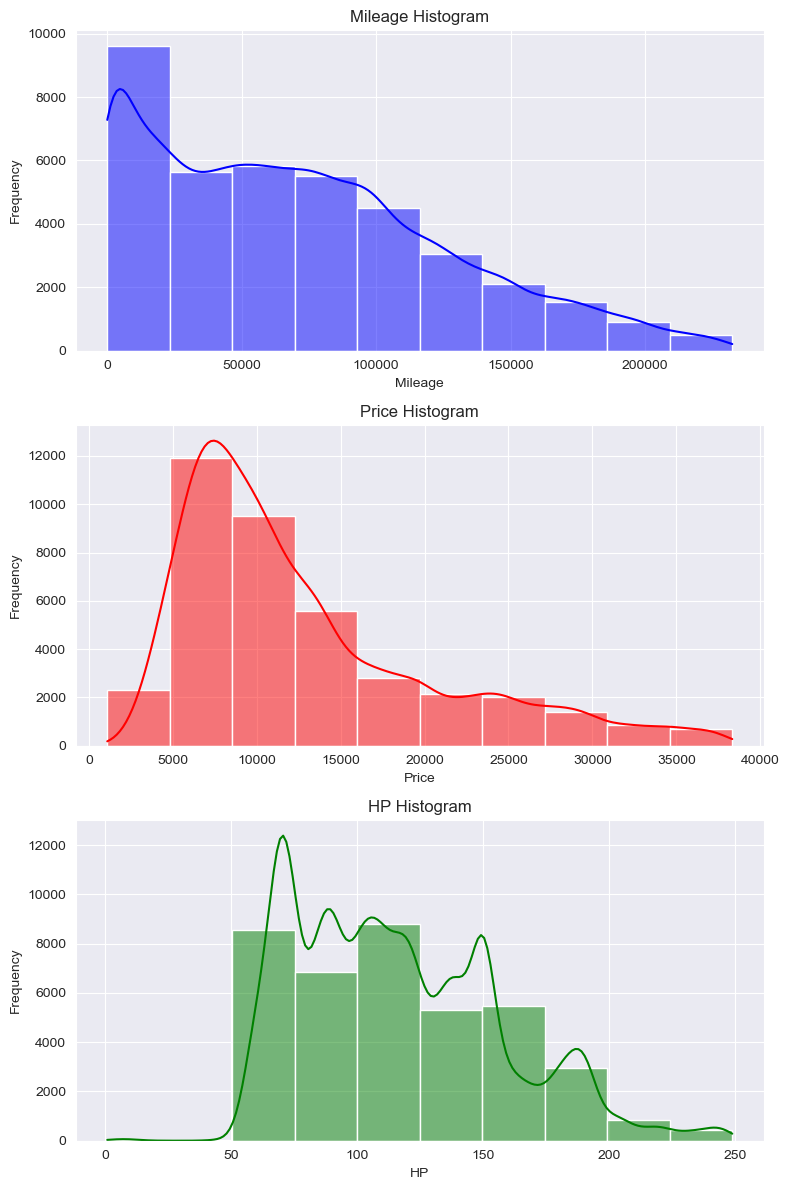

In [24]:
# showing the distribution of the numerical columns 
sns.set_style("darkgrid")
fig, axes = plt.subplots(3, 1, figsize=(8, 12))
# Plot histograms on separate subplots

sns.histplot(df_cleaned['mileage'], kde=True, color='blue', bins=10, ax=axes[0])
axes[0].set_title("Mileage Histogram")
axes[0].set_xlabel("Mileage")
axes[0].set_ylabel("Frequency")

sns.histplot(df_cleaned['price'], kde=True, color='red', bins=10, ax=axes[1])
axes[1].set_title("Price Histogram")
axes[1].set_xlabel("Price")
axes[1].set_ylabel("Frequency")

sns.histplot(df_cleaned['hp'], kde=True, color='green', bins=10, ax=axes[2])
axes[2].set_title("HP Histogram")
axes[2].set_xlabel("HP")
axes[2].set_ylabel("Frequency")

plt.tight_layout()

# Show the plots
plt.show()

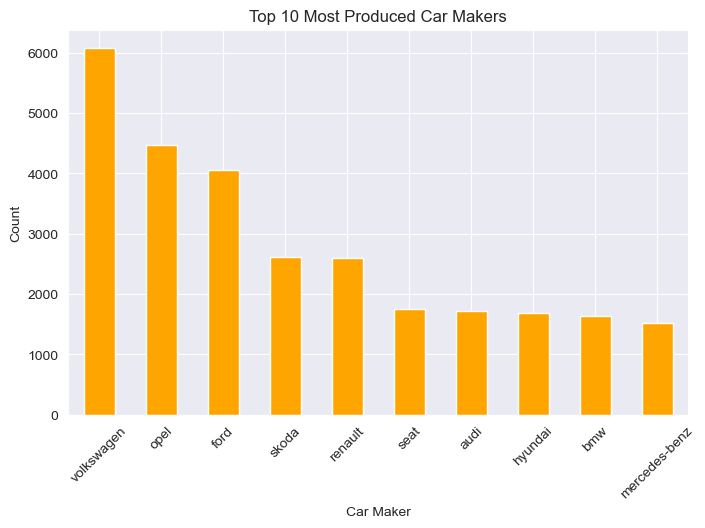

In [25]:
# Getting the top 10 most produced car makers
df_cleaned['make'].value_counts().head(10).plot(kind='bar', color='orange', figsize=(8, 5), rot=45)
plt.xlabel("Car Maker")
plt.ylabel("Count")
plt.title("Top 10 Most Produced Car Makers")
plt.show()

In [26]:
# changing the datatype of the year column to int
df_cleaned['year'] = df_cleaned['year'].astype(int)

In [27]:
# grouping the years and the cars produced using the model 
df_cleaned.groupby('year')['model'].count()

year
2011    3681
2012    3770
2013    3855
2014    3839
2015    3835
2016    3852
2017    3554
2018    3454
2019    3425
2020    3332
2021    2619
Name: model, dtype: int64

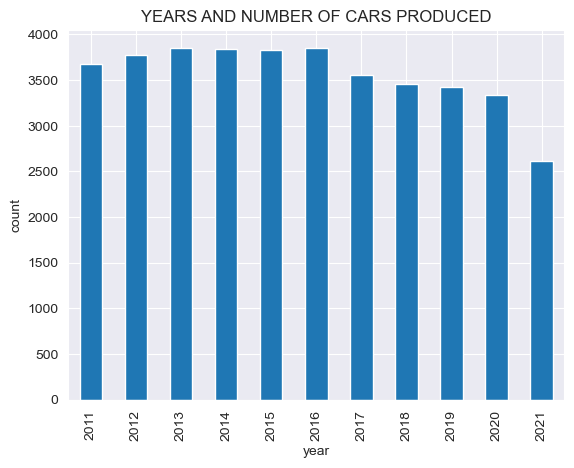

In [28]:
# grouping the years and the cars produced using the model and plotting it
df_cleaned.groupby('year')['model'].count().plot(kind = 'bar')
plt.ylabel('count')
plt.title('YEARS AND NUMBER OF CARS PRODUCED')
plt.show()

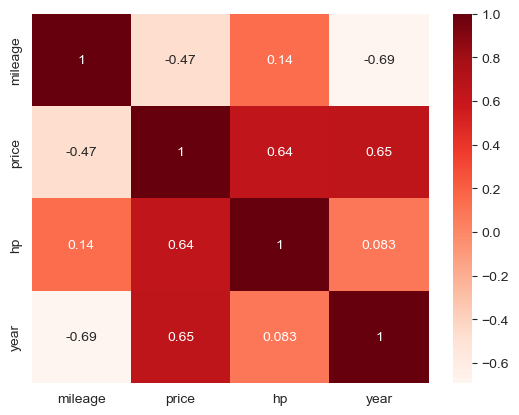

In [29]:
# heatmap to show correlations of numeric columns  
sns.heatmap(df_cleaned.corr(), annot = True, cmap = 'Reds')
plt.show()

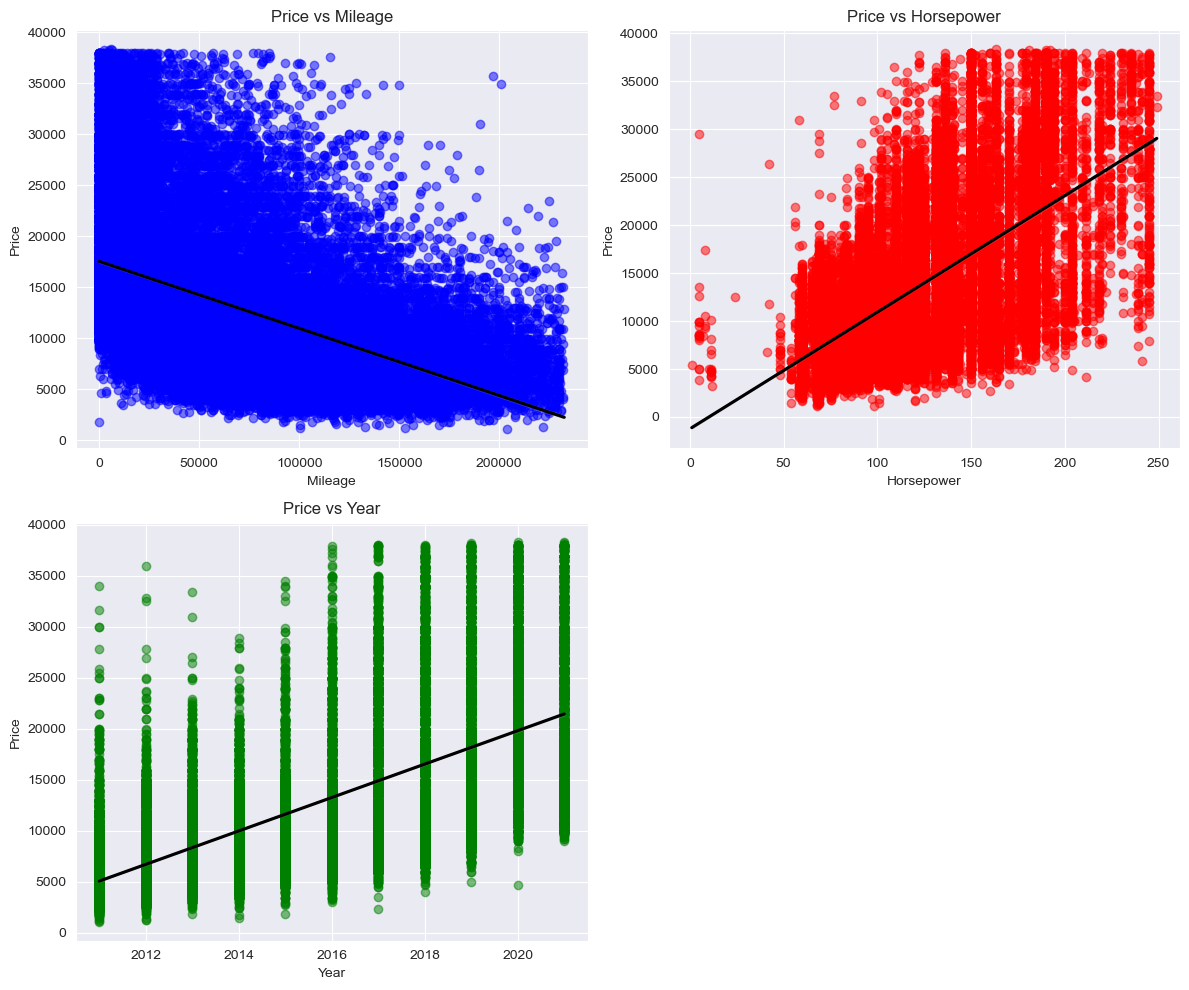

In [30]:
sns.set_style("darkgrid")

# Create a 2x2 figure
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Adjusted figsize for better visibility

# Flatten the 2x2 axes array for easier indexing
axes = axes.flatten()

# Scatter plot with regression line: Price vs Mileage
sns.regplot(data=df_cleaned, x='mileage', y='price', ax=axes[0], 
            scatter_kws={'alpha': 0.5, 'color': 'blue'}, line_kws={'color': 'black'})
axes[0].set_title("Price vs Mileage")
axes[0].set_xlabel("Mileage")
axes[0].set_ylabel("Price")

# Scatter plot with regression line: Price vs HP
sns.regplot(data=df_cleaned, x='hp', y='price', ax=axes[1], 
            scatter_kws={'alpha': 0.5, 'color': 'red'}, line_kws={'color': 'black'})
axes[1].set_title("Price vs Horsepower")
axes[1].set_xlabel("Horsepower")
axes[1].set_ylabel("Price")

# Scatter plot with regression line: Price vs Year
sns.regplot(data=df_cleaned, x='year', y='price', ax=axes[2], 
            scatter_kws={'alpha': 0.5, 'color': 'green'}, line_kws={'color': 'black'})
axes[2].set_title("Price vs Year")
axes[2].set_xlabel("Year")
axes[2].set_ylabel("Price")

# Hide the unused subplot (bottom-right)
axes[3].set_visible(False)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

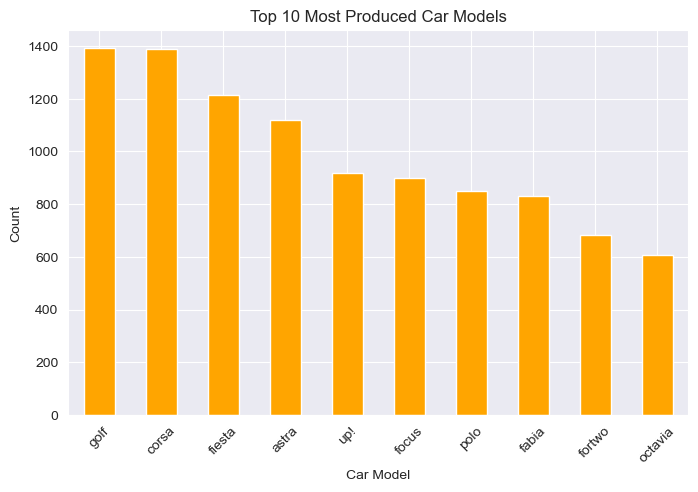

In [31]:
# Getting the top 10 most produced car models
df_cleaned['model'].value_counts().head(10).plot(kind='bar', color='orange', figsize=(8, 5), rot=45)
plt.xlabel("Car Model")
plt.ylabel("Count")
plt.title("Top 10 Most Produced Car Models")
plt.show()

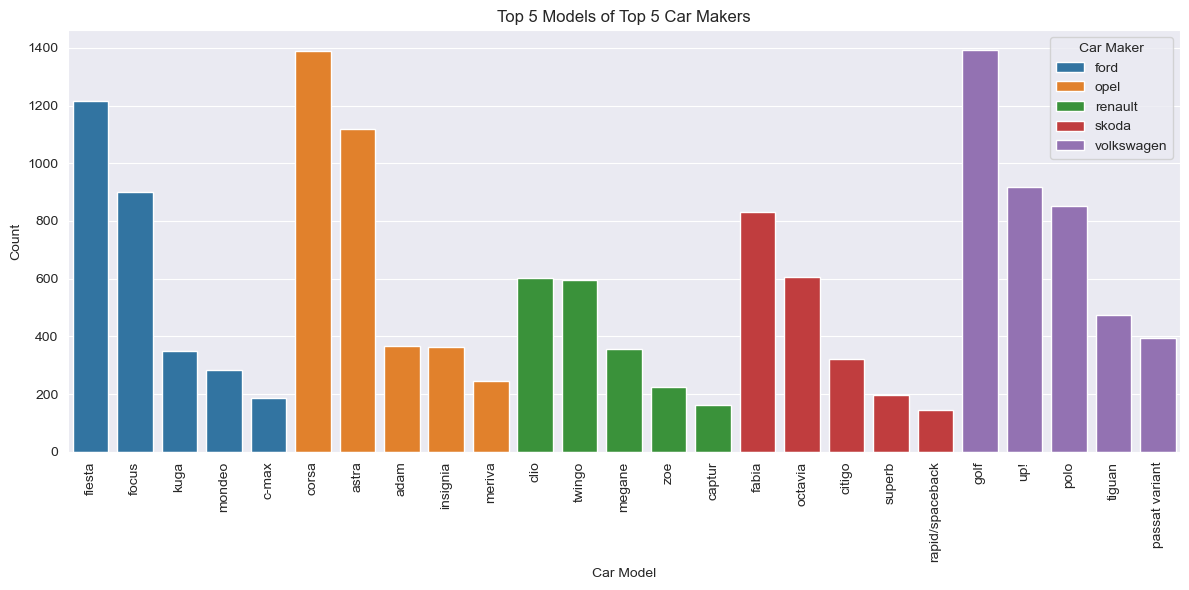

In [32]:
# List of selected car makers
selected_makers = ['volkswagen', 'opel', 'ford', 'skoda', 'renault']

# Filter dataset for selected car makers
filtered_df = df_cleaned[df_cleaned['make'].isin(selected_makers)]

# Group by 'make' and 'model' to count occurrences
top_models = filtered_df.groupby(['make', 'model']).size().reset_index(name='count')

# Get the top 3 models for each selected car maker
top_models = top_models.sort_values(['make', 'count'], ascending=[True, False])
top_models = top_models.groupby('make').head(5)

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(data=top_models, x='model', y='count', hue='make', dodge=False)

# Labels & Title
plt.xlabel("Car Model")
plt.ylabel("Count")
plt.title("Top 5 Models of Top 5 Car Makers")
plt.xticks(rotation=90)

# Show plot
plt.legend(title="Car Maker")
plt.tight_layout()
plt.show()

In [33]:
# liked gear type
df_cleaned['gear'].value_counts()

manual            28094
automatic         11071
semi-automatic       51
Name: gear, dtype: int64

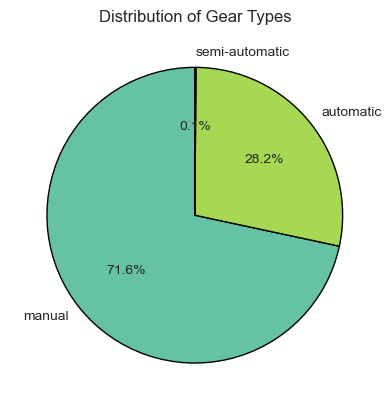

In [34]:
# checking which gear type buyers patronised most
df_cleaned['gear'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set2', wedgeprops={'edgecolor': 'black'})
plt.title("Distribution of Gear Types")
plt.ylabel("")
plt.show()

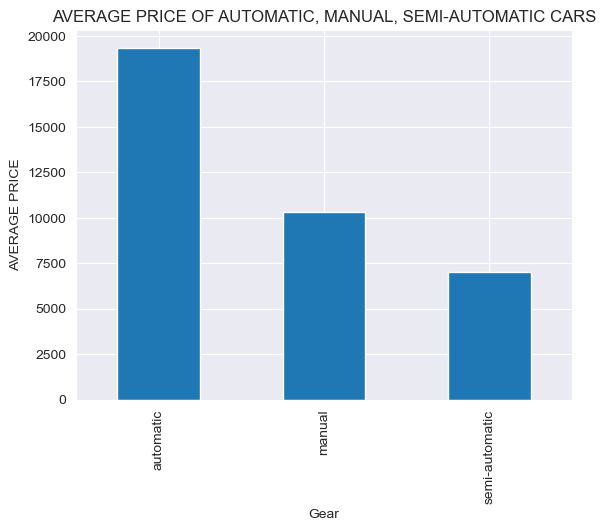

In [35]:
# checking for the average price of manual, automatic, semi-automatic cars
df_cleaned.groupby('gear')['price'].mean().plot(kind = 'bar')
plt.title('AVERAGE PRICE OF AUTOMATIC, MANUAL, SEMI-AUTOMATIC CARS')
plt.xlabel('Gear')
plt.ylabel('AVERAGE PRICE')
plt.show()

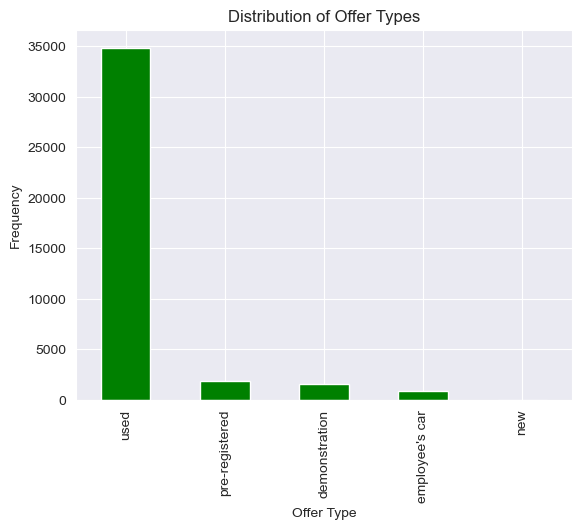

In [36]:
# checking which offer type buyers patronised most
df_cleaned['offerType'].value_counts().plot(kind='bar', color = 'green')
plt.title("Distribution of Offer Types")
plt.ylabel("Frequency")
plt.xlabel('Offer Type')
plt.show()

In [37]:
# checking why most people offer used cars to others based on the average price
df_cleaned.groupby('offerType')['price'].mean()

offerType
demonstration     21870.962611
employee's car    24220.594037
new               20139.857143
pre-registered    19546.264458
used              11823.307944
Name: price, dtype: float64

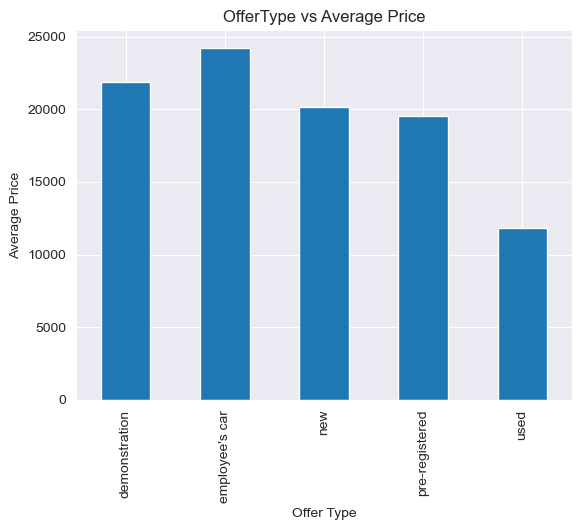

In [38]:
# checking why most people offer used cars to others based on the average price
df_cleaned.groupby('offerType')['price'].mean().plot(kind = 'bar')
plt.xlabel('Offer Type')
plt.ylabel('Average Price')
plt.title('OfferType vs Average Price')
plt.show()

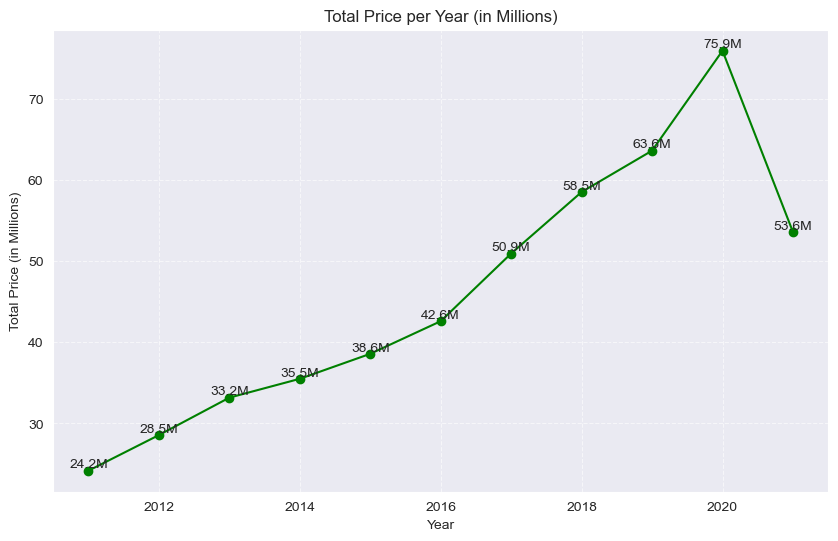

In [39]:
# hows sales in each year changes
yearly_price_sum = df_cleaned.groupby('year')['price'].sum() / 1000000

plt.figure(figsize=(10, 6))
plt.plot(yearly_price_sum.index, yearly_price_sum, color='green', marker='o', linestyle='-')

# Add value labels at each point
for year, price in yearly_price_sum.items():
    plt.text(year, price, f'{price:.1f}M', ha='center', va='bottom', fontsize=10)

plt.xlabel("Year")
plt.ylabel("Total Price (in Millions)")
plt.title("Total Price per Year (in Millions)")

# Show grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Show plot
plt.show()

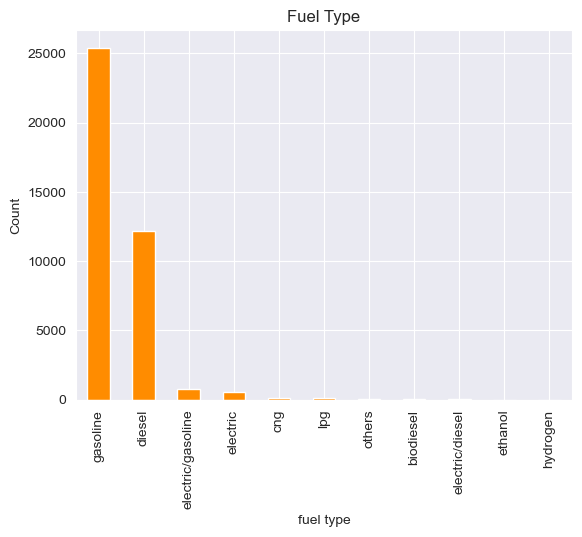

In [40]:
# most used fuel type
df_cleaned['fuel'].value_counts().plot(kind = 'bar', color = 'darkorange')
plt.title('Fuel Type')
plt.xlabel('fuel type')
plt.ylabel('Count')
plt.show()

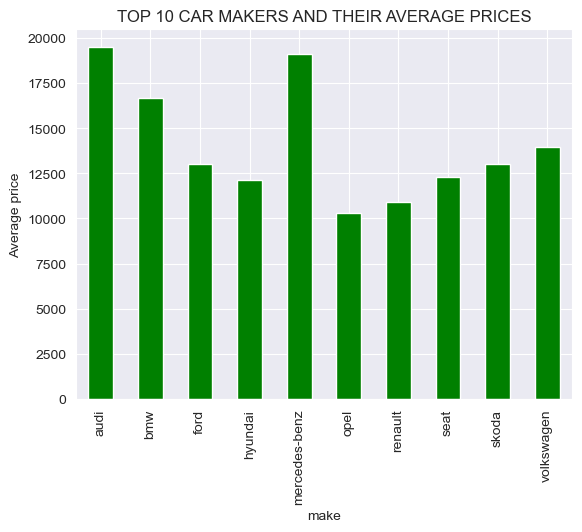

In [41]:
# average car price from the top 5 car makers
top_10_makers = df_cleaned['make'].value_counts().head(10).index  
top_5_avg_price = df_cleaned[df_cleaned['make'].isin(top_10_makers)].groupby('make')['price'].mean()
top_5_avg_price.plot(kind = 'bar', color = 'g')
plt.title('TOP 10 CAR MAKERS AND THEIR AVERAGE PRICES')
plt.ylabel('Average price')
plt.show()

### MACHINE LEARNING MODEL TO PREDICT CAR PRICE

##### label encoding 

In [42]:
# creating the encoder object
encoder = LabelEncoder()

In [43]:
# encoding the columns make, model, fuel, gear, offerType
df_cleaned['make'] = encoder.fit_transform(df_cleaned['make'])
df_cleaned['model'] = encoder.fit_transform(df_cleaned['model'])
df_cleaned['fuel'] = encoder.fit_transform(df_cleaned['fuel'])
df_cleaned['gear'] = encoder.fit_transform(df_cleaned['gear'])
df_cleaned['offerType'] = encoder.fit_transform(df_cleaned['offerType'])

In [44]:
# reviewing the dataset data types after encoding the labels
df_cleaned.dtypes

mileage      int64
make         int32
model        int32
fuel         int32
gear         int32
offerType    int32
price        int64
hp           int32
year         int32
dtype: object

In [45]:
# showing the columns 
df_cleaned.columns

Index(['mileage', 'make', 'model', 'fuel', 'gear', 'offerType', 'price', 'hp',
       'year'],
      dtype='object')

#### grouping the data into input and output data

In [46]:
# input and output data
input_data = df_cleaned[['mileage', 'make', 'model', 'fuel', 'gear', 'offerType', 'hp', 'year']]
output_data = df_cleaned['price']

#### normalising the data to have values between 0 and 1

In [47]:
# standard scaling the values in the input data to have halues between 0 and 1 
np.set_printoptions(formatter={'float': '{:0.3f}'.format}) # rounding to 3 decimal places
scaler = MinMaxScaler(feature_range=(0, 1))

normalised_input_data = scaler.fit_transform(input_data)
normalised_input_data

array([[0.399, 0.963, 0.471, ..., 1.000, 0.488, 0.000],
       [0.642, 0.833, 0.416, ..., 1.000, 0.641, 0.000],
       [0.414, 0.815, 0.614, ..., 1.000, 0.440, 0.000],
       ...,
       [0.002, 0.333, 0.066, ..., 0.000, 0.274, 1.000],
       [0.004, 0.333, 0.684, ..., 0.000, 0.274, 1.000],
       [0.006, 0.852, 0.423, ..., 0.000, 0.238, 1.000]])

#### splitting the data into training and testing data

In [48]:
input_train, input_test, output_train, output_test = train_test_split(normalised_input_data, output_data, test_size=0.2, random_state=27)

In [49]:
input_train[:5]

array([[0.000, 0.389, 0.515, 0.700, 0.500, 0.750, 0.266, 1.000],
       [0.380, 0.093, 0.079, 0.200, 0.000, 1.000, 0.762, 0.700],
       [0.578, 0.852, 0.423, 0.700, 0.500, 1.000, 0.343, 0.100],
       [0.093, 0.056, 0.113, 0.700, 0.000, 1.000, 0.601, 0.900],
       [0.068, 0.389, 0.520, 0.700, 0.000, 1.000, 0.560, 0.800]])

In [50]:
input_test[:5]

array([[0.645, 0.630, 0.929, 0.200, 0.000, 1.000, 0.762, 0.800],
       [0.348, 0.870, 0.434, 0.700, 0.000, 1.000, 0.242, 0.200],
       [0.106, 0.963, 0.236, 0.200, 0.000, 1.000, 0.407, 0.800],
       [0.168, 0.500, 0.823, 0.700, 0.500, 1.000, 0.528, 0.300],
       [0.537, 0.852, 0.769, 0.700, 0.500, 1.000, 0.343, 0.300]])

In [51]:
output_train[:5]

6768     12990
30170    27999
35875     4500
13469    33750
12619    18990
Name: price, dtype: int64

In [52]:
output_test[:5]

2230     29980
31572     4990
3738     22890
5342      9990
37388     6299
Name: price, dtype: int64

### Linear Regression Model

In [53]:
# creating the linear regression model 
lr_model = LinearRegression()

In [54]:
# fitting the daata/ training 
lr_model.fit(input_train, output_train)

LinearRegression()

In [55]:
# testing the lr model
lr_prediction = lr_model.predict(input_test)
lr_prediction

array([22901.078, 5474.501, 18667.331, ..., 7214.158, 4931.913, 9799.122])

In [56]:
# checking the metrics of the linear regression model 
lr_r2 = ceil(r2_score(output_test, lr_prediction) * 100)
lr_mse = round(mean_squared_error(output_test, lr_prediction, squared=False),2)
print(lr_r2, '%')
print(lr_mse)

84 %
3110.37


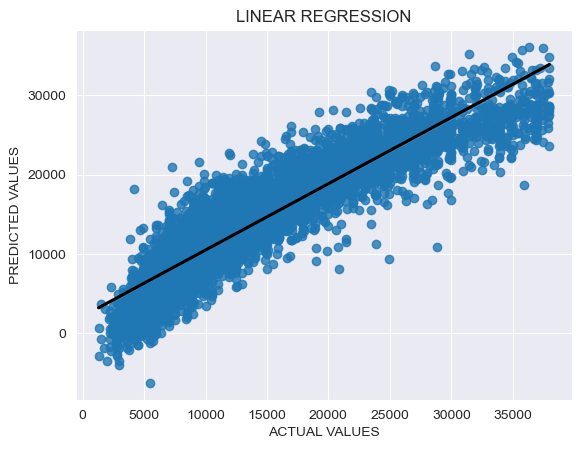

In [57]:
# visualisation of the actual and the predicted values 
sns.regplot(x=output_test, y=lr_prediction, line_kws={"color": "black"})
plt.xlabel('ACTUAL VALUES')
plt.ylabel('PREDICTED VALUES')
plt.title('LINEAR REGRESSION')
plt.show()

#### Decision Tree regressor

In [58]:
# creating model 
dt_model = DecisionTreeRegressor()

In [59]:
# fitting the data/ training 
dt_model.fit(input_train, output_train)

DecisionTreeRegressor()

In [60]:
# testing the dt model
dt_prediction = dt_model.predict(input_test)
dt_prediction

array([23500.000, 4125.000, 24900.000, ..., 8500.000, 5450.000, 7790.000])

In [61]:
# checking the metrics of the model 
dt_r2 = ceil(r2_score(output_test, dt_prediction) * 100)
dt_mse = round(mean_squared_error(output_test, dt_prediction, squared=False), 2)
print(dt_r2, '%')
print(dt_mse)

89 %
2661.77


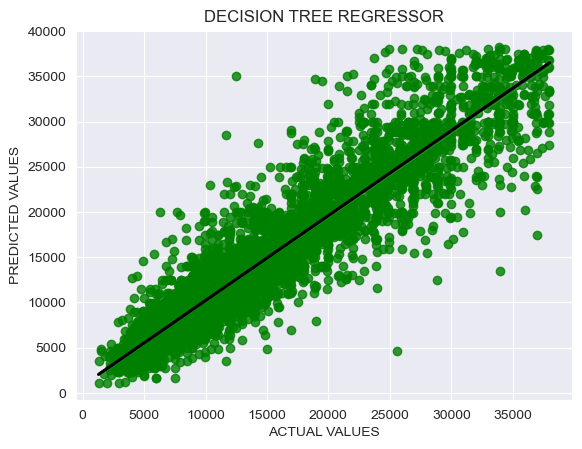

In [62]:
# visualisation of the actual and the predicted values 
sns.regplot(x=output_test, y=dt_prediction,color = 'g', line_kws={"color": "black"})
plt.xlabel('ACTUAL VALUES')
plt.ylabel('PREDICTED VALUES')
plt.title('DECISION TREE REGRESSOR')
plt.show()

#### random forest regressor

In [63]:
# creating model 
rf_model = RandomForestRegressor()

In [64]:
# fitting the data/ training 
rf_model.fit(input_train, output_train)

RandomForestRegressor()

In [65]:
# testing the rf model
rf_prediction = rf_model.predict(input_test)
rf_prediction

array([27807.230, 4351.735, 21516.470, ..., 8496.880, 5132.480, 8326.290])

In [66]:
# checking the metrics of the model 
rf_r2 = ceil(r2_score(output_test, rf_prediction) * 100)
rf_mse = round(mean_squared_error(output_test, rf_prediction, squared=False), 2)
print(rf_r2, '%')
print(rf_mse)

94 %
1961.83


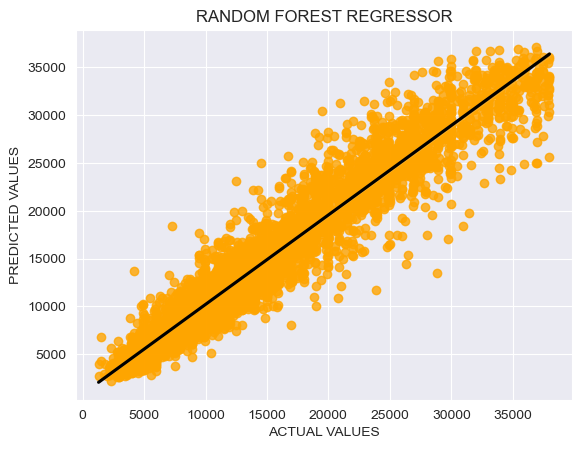

In [67]:
# visualisation of the actual and the predicted values 
sns.regplot(x=output_test, y=rf_prediction,color = 'orange', line_kws={"color": "black"})
plt.xlabel('ACTUAL VALUES')
plt.ylabel('PREDICTED VALUES')
plt.title('RANDOM FOREST REGRESSOR')
plt.show()

### OBSERVATIONS AFTER ANALYSIS

##### 1. It was observed that the top car maker in Germany between the years 2011 to 2021 was volkswagen, followed by opel, ford and others.
##### 2. Also, the top 3 years that most of the cars were produced are 2013, followed by 2016, and 2014.
##### 3. Again, the price of the car showed a positive correlation with the year and the horsepower whilst a negative correlation with the car's mileage.
##### 4. It was also seen that, the top 3 models that was produced and patonised more was golf, corsa, and fiesta models.
##### 5. Buyers also bought more of the manual cars (71.6%) because of the average price of those vehicles compared to the automatic and the semi-automatic.
##### 6. It was also seen that, from the year 2011 - 2021, most germans patonised used cars the most because it was affordable and least expensive cars and most those cars used gasoline and diesel fuel types.
##### 7. In the year 2020, the automobile company in all make 75.9 million dollars and that was the highest sales made from 2011 - 2021
##### 8. It was aslo disscoverf that, the top three car markers that their avevrage car price seemed high was audi, followed by mercedes benz, and bmw.
##### 9. The top 3 features that tends to affect the cars price the most are:

######                        (a). the year of the car. newer cars tends to have higher prices.


######                        (b). the cars hoese power. Cars with high horse power tend to be sold at high prices.


######                        (c). the mileage fo the car. The higher the milage of the car, the lesser it price and vice versa.


##### 10. Finally , the best model to predict the car price was found to be random forest regressor having the accuracy of 94% and a mean squared error of 1962.71, which is less compared to the other models tested.

#
#

#### CAR PRICE PREDICTOR

In [68]:
# Assuming `scaler` is the MinMaxScaler used during training
pred2_scaled = scaler.transform([[858398, 1, 2, 3, 2, 1, 130, 1991]])
pred2 = rf_model.predict(pred2_scaled)
print(f"\nThe Price of The Car is: ${pred2[0]}\n")


The Price of The Car is: $5029.82

